In [278]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [279]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score


In [280]:
data = pd.read_csv('dataset.csv')
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [281]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [282]:
data.shape

(303, 14)

In [283]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [284]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [285]:
data.drop_duplicates(inplace=True)

In [286]:
X=data.iloc[:, :-1]
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [287]:
Y=data.iloc[:, -1]
Y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 302, dtype: int64

In [288]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split (X,Y, test_size=0.2, random_state=2)

In [289]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
237,60,1,0,140,293,0,0,170,0,1.2,1,2,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
10,54,1,0,140,239,0,1,160,0,1.2,2,0,2
153,66,0,2,146,278,0,0,152,0,0.0,1,1,2
77,59,1,1,140,221,0,1,164,1,0.0,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
22,42,1,0,140,226,0,1,178,0,0.0,2,0,2
72,29,1,1,130,204,0,0,202,0,0.0,2,0,2
15,50,0,2,120,219,0,1,158,0,1.6,1,0,2


In [290]:
X_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
99,53,1,2,130,246,1,0,173,0,0.0,2,3,2
296,63,0,0,124,197,0,1,136,1,0.0,1,0,2
89,58,0,0,100,248,0,0,122,0,1.0,1,0,2
30,41,0,1,105,198,0,1,168,0,0.0,2,1,2
297,59,1,0,164,176,1,0,90,0,1.0,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
174,60,1,0,130,206,0,0,132,1,2.4,1,2,3
94,45,0,1,112,160,0,1,138,0,0.0,1,0,2
161,55,0,1,132,342,0,1,166,0,1.2,2,0,2
217,63,1,0,130,330,1,0,132,1,1.8,2,3,3


array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'cp'}>,
        <Axes: title={'center': 'trestbps'}>],
       [<Axes: title={'center': 'chol'}>,
        <Axes: title={'center': 'fbs'}>,
        <Axes: title={'center': 'restecg'}>,
        <Axes: title={'center': 'thalach'}>],
       [<Axes: title={'center': 'exang'}>,
        <Axes: title={'center': 'oldpeak'}>,
        <Axes: title={'center': 'slope'}>,
        <Axes: title={'center': 'ca'}>],
       [<Axes: title={'center': 'thal'}>,
        <Axes: title={'center': 'target'}>, <Axes: >, <Axes: >]],
      dtype=object)

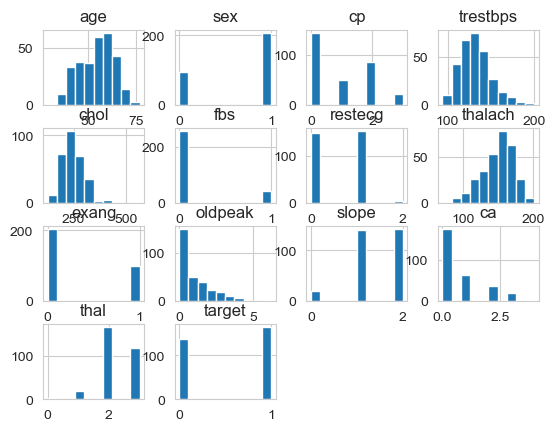

In [291]:
data.hist()

<Axes: xlabel='target', ylabel='count'>

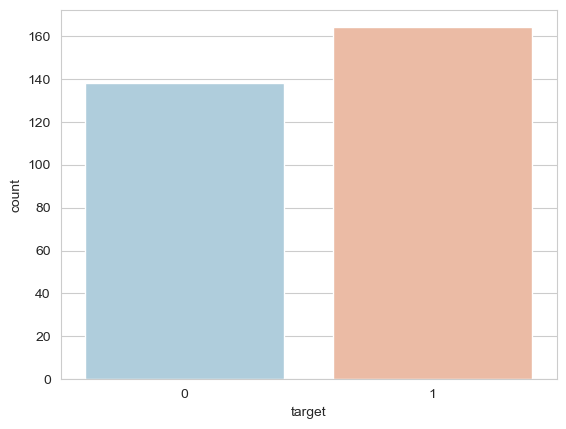

In [292]:
import seaborn as sns
sns.set_style('whitegrid')
sns.countplot(x='target',data=data,palette='RdBu_r')

In [293]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)

In [294]:
X_train

array([[ 0.58335005,  0.6983225 , -0.92981682, ..., -0.67709913,
         1.38002844,  1.11450549],
       [ 1.56419212,  0.6983225 ,  1.94307874, ..., -0.67709913,
         0.34069452, -0.53332165],
       [-0.07054466,  0.6983225 , -0.92981682, ...,  0.95470977,
        -0.6986394 , -0.53332165],
       ...,
       [-2.79510595,  0.6983225 ,  0.02781503, ...,  0.95470977,
        -0.6986394 , -0.53332165],
       [-0.50647446, -1.43200311,  0.98544689, ..., -0.67709913,
        -0.6986394 , -0.53332165],
       [-0.17952711,  0.6983225 , -0.92981682, ..., -2.30890803,
        -0.6986394 ,  1.11450549]])

In [295]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, Y_train)

LogisticRegression()

In [296]:
Y_pred = model.predict(X_test)

In [297]:
from sklearn.metrics import confusion_matrix
ConfusionMatrix=confusion_matrix(Y_test,Y_pred)
print(ConfusionMatrix)

[[25  8]
 [ 1 27]]


In [298]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_test, Y_pred)*100
accuracy


85.24590163934425

In [299]:
#SVC
from sklearn import svm

In [300]:
svm = svm.SVC()

In [301]:
svm.fit(X_train,Y_train)

SVC()

In [302]:
y_pred2 = svm.predict(X_test)

In [303]:
accuracy_score(Y_test,y_pred2)*100

88.52459016393442

In [304]:
# KNeighbors Classifier

In [305]:
from sklearn.neighbors import KNeighborsClassifier

In [306]:
knn_score = KNeighborsClassifier()

In [307]:
knn_score.fit(X_train,Y_train)

KNeighborsClassifier()

In [308]:
y_pred3 = knn_score.predict(X_test)

In [309]:
accuracy_score(Y_test,y_pred3)*100

86.88524590163934

In [310]:
score = []

for k in range(1,40) :
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,Y_train)
    y_pred= knn.predict(X_test)
    score.append(accuracy_score(Y_test,y_pred)*100)

In [312]:
score

[80.32786885245902,
 86.88524590163934,
 88.52459016393442,
 90.1639344262295,
 86.88524590163934,
 90.1639344262295,
 85.24590163934425,
 88.52459016393442,
 85.24590163934425,
 86.88524590163934,
 86.88524590163934,
 90.1639344262295,
 90.1639344262295,
 88.52459016393442,
 86.88524590163934,
 85.24590163934425,
 85.24590163934425,
 85.24590163934425,
 85.24590163934425,
 88.52459016393442,
 86.88524590163934,
 88.52459016393442,
 88.52459016393442,
 88.52459016393442,
 88.52459016393442,
 90.1639344262295,
 90.1639344262295,
 90.1639344262295,
 90.1639344262295,
 90.1639344262295,
 88.52459016393442,
 86.88524590163934,
 88.52459016393442,
 88.52459016393442,
 88.52459016393442,
 90.1639344262295,
 88.52459016393442,
 88.52459016393442,
 88.52459016393442]

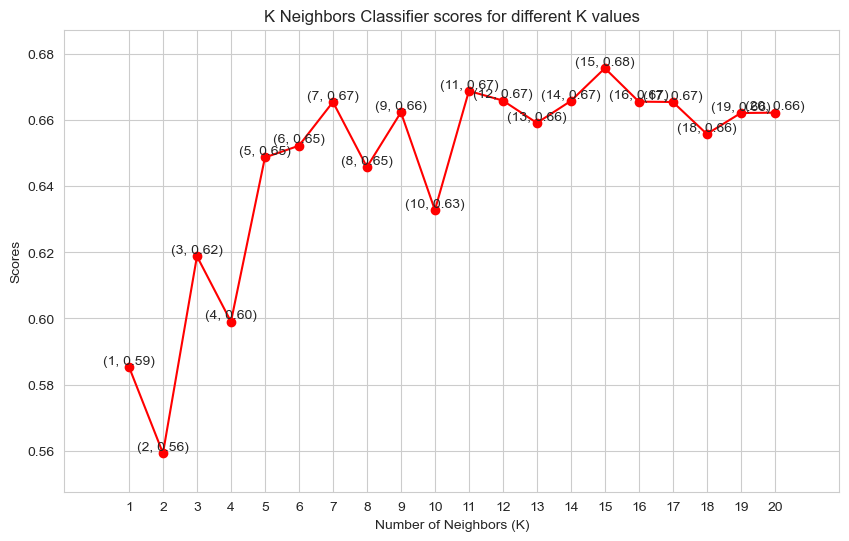

In [340]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot([k for k in range(1, 21)], knn_scores, color='red', marker='o', linestyle='-')
for i in range(1, 21):
    plt.text(i, knn_scores[i-1], f'({i}, {knn_scores[i-1]:.2f})', ha='center', va='bottom')

plt.xticks([i for i in range(1, 21)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')
plt.margins(0.1)
plt.show()


In [344]:
knn=KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train,Y_train)
y_pred= knn.predict(X_test)
accuracy_score(Y_test,y_pred)*100


63.934426229508205

In [345]:
# Non-Linear ML Algorithms

In [346]:
data = pd.read_csv('dataset.csv')

In [347]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [348]:
data = data.drop_duplicates()

In [349]:
data.shape

(302, 14)

In [350]:
X = data.drop('target',axis=1)
y = data['target']

In [351]:
X_train, X_test, Y_train, Y_test = train_test_split (X,Y, test_size=0.2, random_state=42)

In [352]:
#Decisison Tree Classifier

In [353]:
from sklearn.tree import DecisionTreeClassifier

In [354]:
data = DecisionTreeClassifier()

In [355]:
data.fit(X_train,Y_train)

DecisionTreeClassifier()

In [356]:
y_pred4=data.predict(X_test)

In [357]:
accuracy_score(Y_test,y_pred4)*100

75.40983606557377

In [358]:
#Random Forest Classsifier

In [359]:
from sklearn.ensemble import RandomForestClassifier

In [360]:
rf = RandomForestClassifier()

In [361]:
rf.fit(X_train,Y_train)

RandomForestClassifier()

In [362]:
y_pred5=rf.predict(X_test)

In [363]:
accuracy_score(Y_test,y_pred5)*100

86.88524590163934

In [364]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [365]:
nb_model = GaussianNB()

In [366]:
nb_model.fit(X_train, Y_train)

GaussianNB()

In [367]:
nb_predictions = nb_model.predict(X_test)

In [368]:
accuracy_score(Y_test, nb_predictions)*100

88.52459016393442